THIS IS A ROUGH NOTEBOOK FOR MY TESTING AND PLAYING AROUND WITH THINGS 
THIS IS NOT A PART OF THE ASSIGNMENT BUT LEAVING THIS HERE IF YOU WISH TO GO THROUGH THE PROCESS I FOLLOWED 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns


In [3]:
df = pd.read_excel("data.xlsx", index_col="time")
df.tail()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96
2020-08-07 12:15:00,880.86,905.31,-235.02,-219.44,882.1,-184.02


In [10]:
df.shape

(377719, 6)

In [11]:
df = df.drop_duplicates(keep="first")

In [12]:
df.shape

(376946, 6)

In [65]:
missing_values_col1 = df.isnull().sum()
print("Missing values from the data are", missing_values_col1)

Missing values from the data are Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 375631 entries, 2017-01-01 00:00:00 to 2020-08-07 12:15:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Cyclone_Inlet_Gas_Temp    375631 non-null  object
 1   Cyclone_Material_Temp     375631 non-null  object
 2   Cyclone_Outlet_Gas_draft  375631 non-null  object
 3   Cyclone_cone_draft        375631 non-null  object
 4   Cyclone_Gas_Outlet_Temp   375631 non-null  object
 5   Cyclone_Inlet_Draft       375631 non-null  object
dtypes: object(6)
memory usage: 20.1+ MB


In [5]:
df = df.apply(pd.to_numeric, errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 377719 entries, 2017-01-01 00:00:00 to 2020-08-07 12:15:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cyclone_Inlet_Gas_Temp    376399 non-null  float64
 1   Cyclone_Material_Temp     376128 non-null  float64
 2   Cyclone_Outlet_Gas_draft  376398 non-null  float64
 3   Cyclone_cone_draft        376399 non-null  float64
 4   Cyclone_Gas_Outlet_Temp   376398 non-null  float64
 5   Cyclone_Inlet_Draft       376397 non-null  float64
dtypes: float64(6)
memory usage: 20.2 MB


In [68]:
df.isnull().sum()

Cyclone_Inlet_Gas_Temp        5
Cyclone_Material_Temp       276
Cyclone_Outlet_Gas_draft      6
Cyclone_cone_draft            5
Cyclone_Gas_Outlet_Temp       6
Cyclone_Inlet_Draft           7
dtype: int64

In [69]:
nadrop =  df.dropna()
nadrop.isnull().sum()

Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [6]:
df.interpolate(method='time', inplace=True)
df.isnull().sum()

Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 377719 entries, 2017-01-01 00:00:00 to 2020-08-07 12:15:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cyclone_Inlet_Gas_Temp    377719 non-null  float64
 1   Cyclone_Material_Temp     377719 non-null  float64
 2   Cyclone_Outlet_Gas_draft  377719 non-null  float64
 3   Cyclone_cone_draft        377719 non-null  float64
 4   Cyclone_Gas_Outlet_Temp   377719 non-null  float64
 5   Cyclone_Inlet_Draft       377719 non-null  float64
dtypes: float64(6)
memory usage: 20.2 MB


Text(0, 0.5, 'Cyclone_Inlet_Draft')

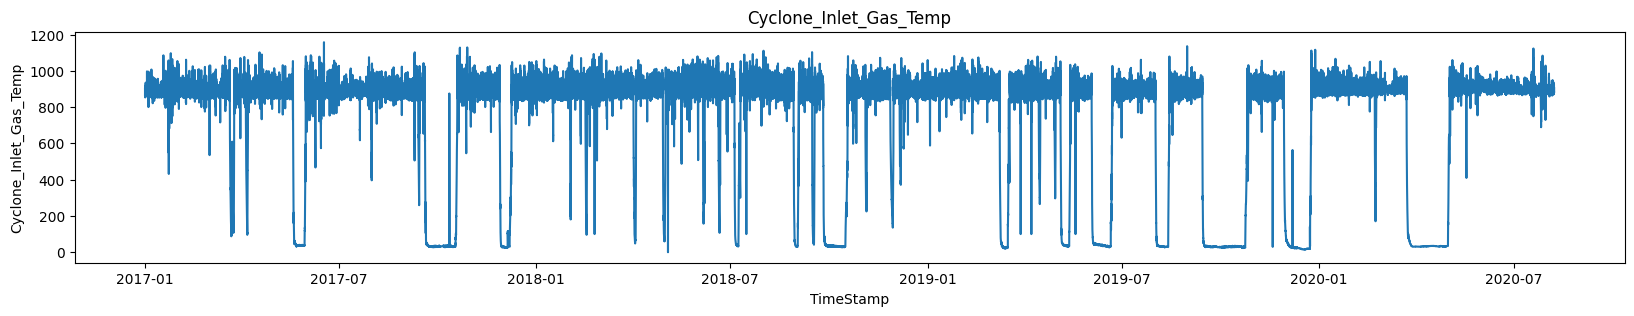

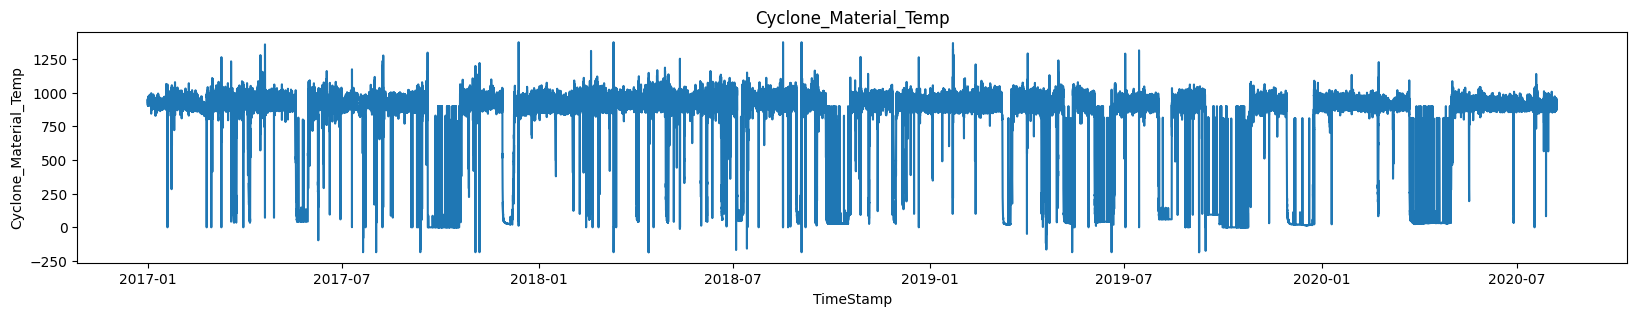

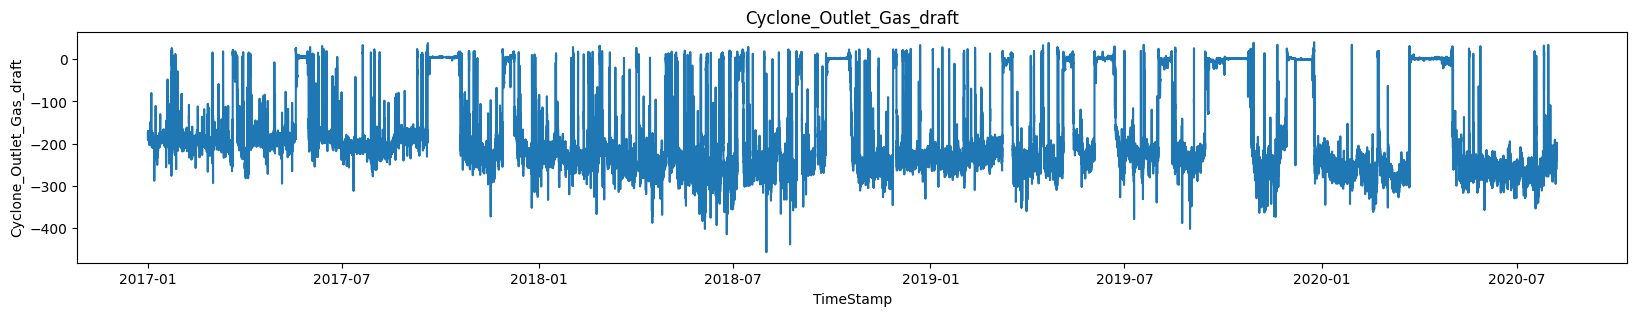

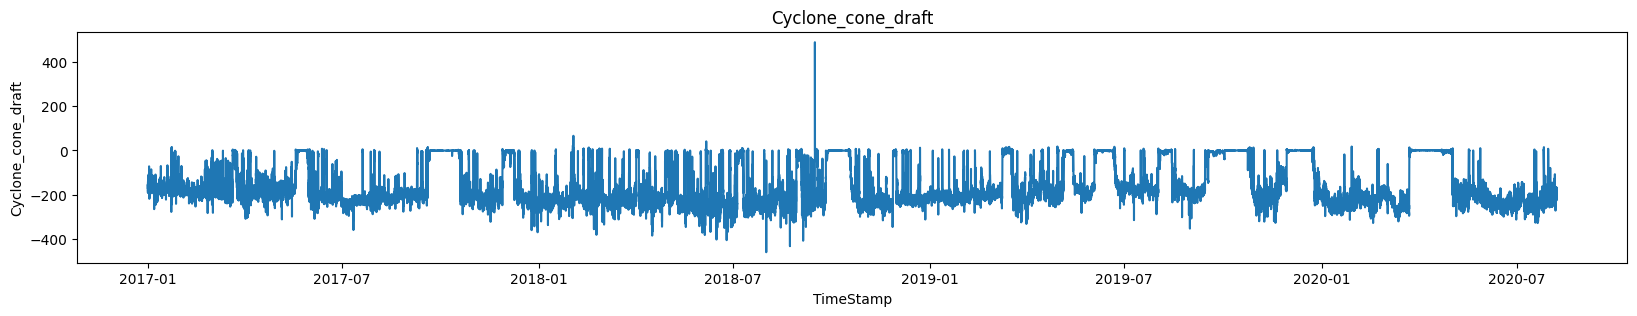

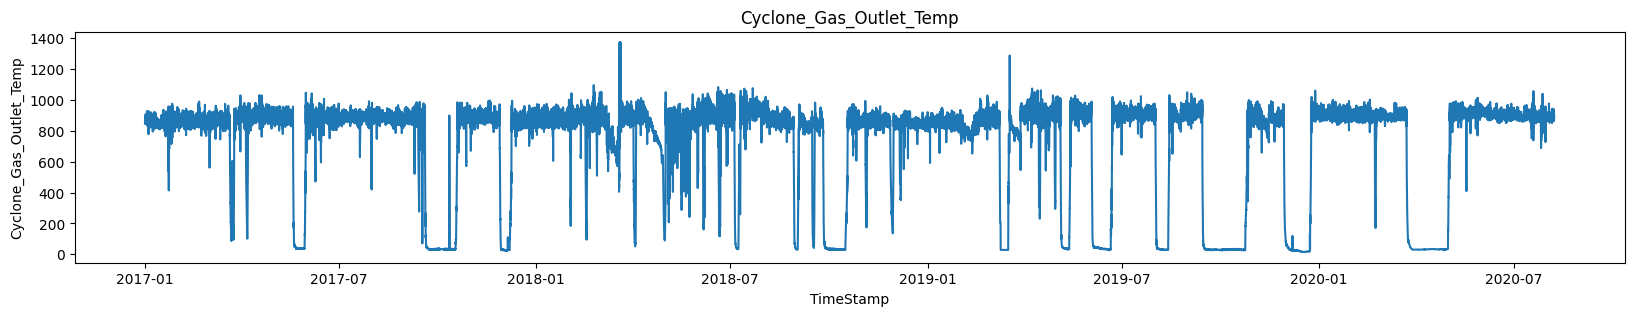

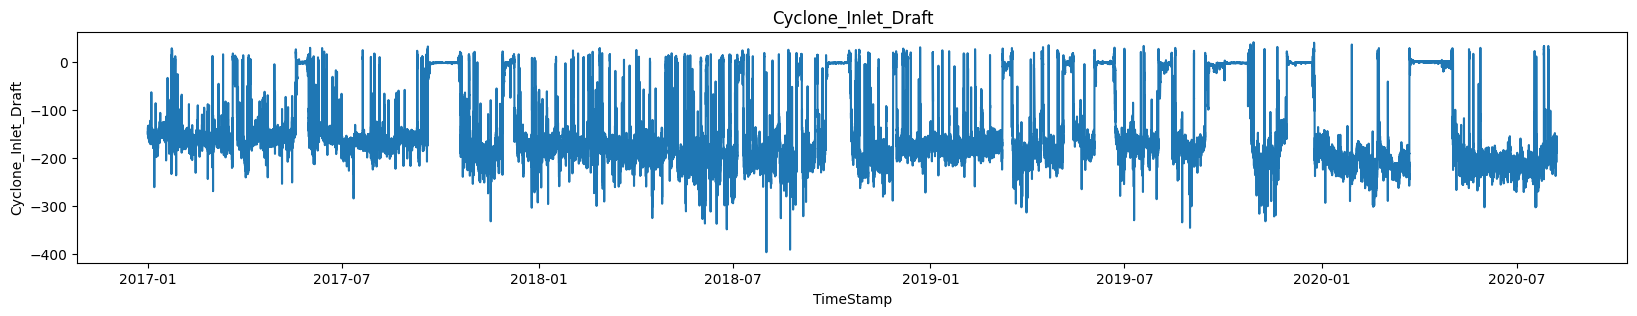

In [72]:
plt.figure(figsize=(20,3))
plt.plot(df['Cyclone_Inlet_Gas_Temp'])
plt.title('Cyclone_Inlet_Gas_Temp')
plt.xlabel('TimeStamp')
plt.ylabel('Cyclone_Inlet_Gas_Temp')

plt.figure(figsize=(20,3))
plt.plot(df['Cyclone_Material_Temp'])
plt.title('Cyclone_Material_Temp')
plt.xlabel('TimeStamp')
plt.ylabel('Cyclone_Material_Temp')

plt.figure(figsize=(20,3))
plt.plot(df['Cyclone_Outlet_Gas_draft'])
plt.title('Cyclone_Outlet_Gas_draft')
plt.xlabel('TimeStamp')
plt.ylabel('Cyclone_Outlet_Gas_draft')

plt.figure(figsize=(20,3))
plt.plot(df['Cyclone_cone_draft'])
plt.title('Cyclone_cone_draft')
plt.xlabel('TimeStamp')
plt.ylabel('Cyclone_cone_draft')

plt.figure(figsize=(20,3))
plt.plot(df['Cyclone_Gas_Outlet_Temp'])
plt.title('Cyclone_Gas_Outlet_Temp')
plt.xlabel('TimeStamp')
plt.ylabel('Cyclone_Gas_Outlet_Temp')

plt.figure(figsize=(20,3))
plt.plot(df['Cyclone_Inlet_Draft'])
plt.title('Cyclone_Inlet_Draft')
plt.xlabel('TimeStamp')
plt.ylabel('Cyclone_Inlet_Draft')

# def makeplot(data):
#     plt.figure(figsize=(20,3))
#     plt.plot(data)
#     plt.title(data.columns[0])
#     plt.xlabel('TimeStamp')
#     plt.ylabel('data')
    

In [14]:
model_df = df.copy()

model_df

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...
2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
2020-08-07 12:00:00,879.90,895.02,-228.04,-211.28,878.08,-176.94
2020-08-07 12:05:00,887.20,895.70,-230.11,-214.65,885.32,-179.18


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df)



In [9]:
df.head()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,0.749488,0.702192,0.537540,0.288208,0.615879,0.571836
2017-01-01 00:05:00,0.759509,0.707141,0.548025,0.292363,0.623519,0.563024
2017-01-01 00:10:00,0.756433,0.711013,0.554203,0.308848,0.626112,0.573868
2017-01-01 00:15:00,0.756097,0.710353,0.558449,0.300031,0.625958,0.578868
2017-01-01 00:20:00,0.770246,0.717474,0.560119,0.301201,0.633458,0.577567


Text(0, 0.5, 'Cyclone_Inlet_Draft')

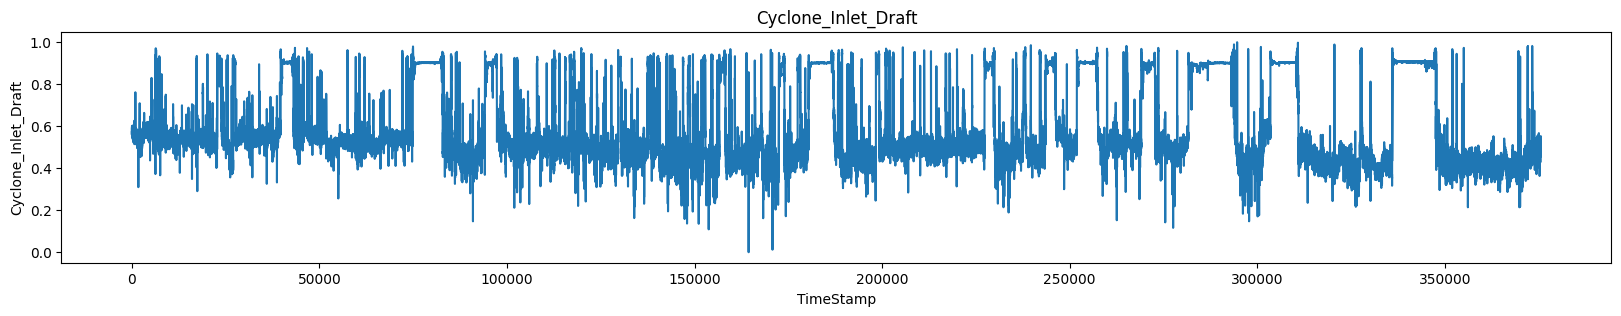

In [17]:
plt.figure(figsize=(20,3))
plt.plot(model_df[5])
plt.title('Cyclone_Inlet_Draft')
plt.xlabel('TimeStamp')
plt.ylabel('Cyclone_Inlet_Draft')

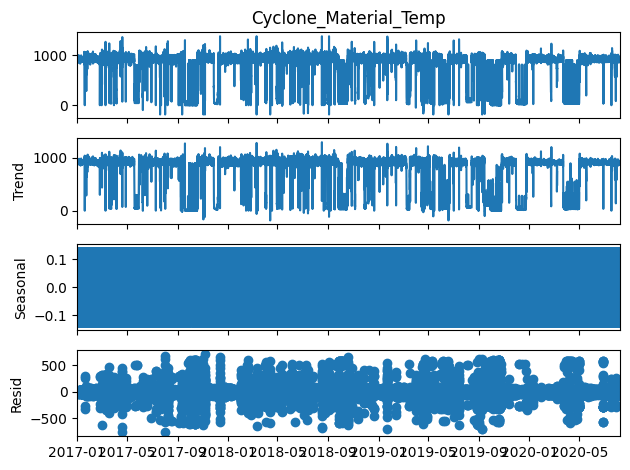

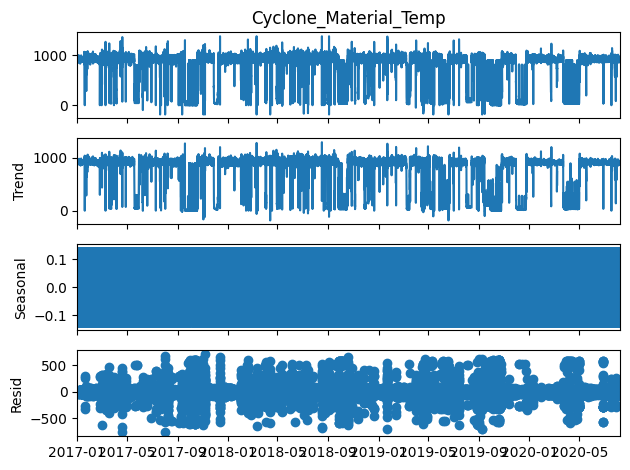

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Cyclone_Material_Temp'], model = 'additive', period = 3)

decompose.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller 

dftest = adfuller(df['Cyclone_Material_Temp'])
print('adf result:', dftest[0])
print('p-value:', dftest[1])
print('critical values:' )
for keys, values in dftest[4].items():
    print(keys,':', values)

adf result: -10.45519983425602
p-value: 1.4045436070942491e-18
critical values:
1% : -3.4303674133166617
5% : -2.8615476964753803
10% : -2.5667740965536816


<Axes: >

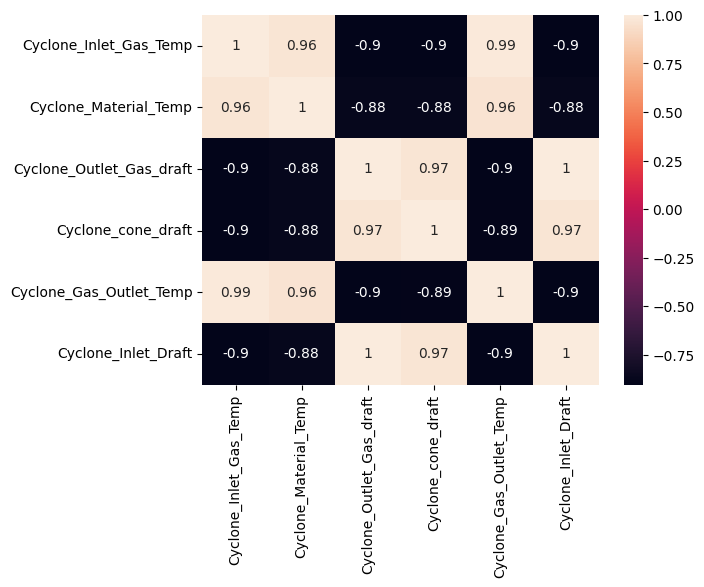

In [20]:
correlation = df.corr()
# correlation
sns.heatmap(correlation, annot = True)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=100, contamination='auto')
outlier = lof.fit_predict(df)
# df['Abnormal point'] = outlier
df['LOF Score'] = lof.negative_outlier_factor_
threshold = np.percentile(df['LOF Score'], 1) 
df['Anomaly'] = df['LOF Score'] < threshold  



In [29]:
df.tail()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Abnormal point,LOF Score,Anomaly
time,,,,,,,,,
2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15,1,-0.977683,False
2020-08-07 12:00:00,879.90,895.02,-228.04,-211.28,878.08,-176.94,1,-0.979776,False
2020-08-07 12:05:00,887.20,895.70,-230.11,-214.65,885.32,-179.18,1,-0.970072,False
2020-08-07 12:10:00,908.50,916.33,-231.51,-218.09,906.20,-181.96,1,-1.061678,False
2020-08-07 12:15:00,880.86,905.31,-235.02,-219.44,882.10,-184.02,1,-0.996284,False


C:\Users\hp\AppData\Local\Temp\ipykernel_31984\1391978887.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


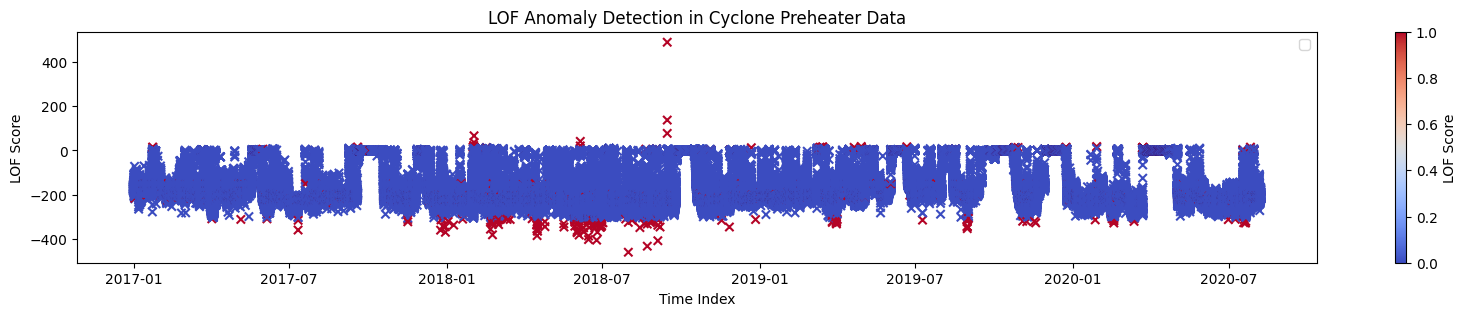

In [78]:
plt.figure(figsize=(20, 3))
plt.scatter(df.index, df['Cyclone_cone_draft'], c=df['Cyclone_cone_draft_Anomaly'], cmap='coolwarm', marker='x')
# plt.scatter(df.index, df['Abnormal point'] == 1, color='red', marker='x', label='Anomalies')
# plt.axhline(y=-1.5, color='r', linestyle='--', label="Outlier threshold")
plt.colorbar(label='LOF Score')
plt.xlabel('Time Index')
plt.ylabel('LOF Score')
plt.title('LOF Anomaly Detection in Cyclone Preheater Data')
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_31984\220542710.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


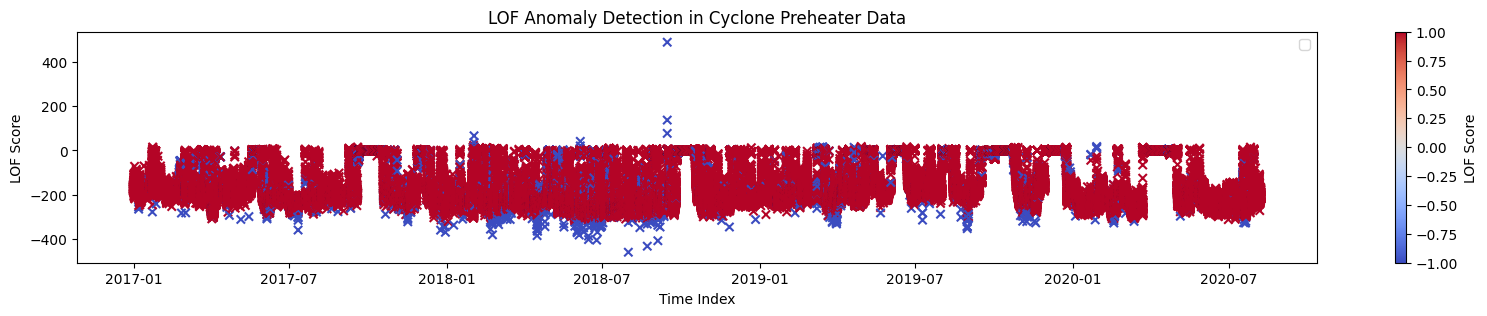

In [59]:
plt.figure(figsize=(20, 3))
plt.scatter(df.index, df['Cyclone_cone_draft'], c=df['Abnormal point'], cmap='coolwarm', marker='x')
# plt.scatter(df.index, df['Abnormal point'] == 1, color='red', marker='x', label='Anomalies')
# plt.axhline(y=-1.5, color='r', linestyle='--', label="Outlier threshold")
plt.colorbar(label='LOF Score')
plt.xlabel('Time Index')
plt.ylabel('LOF Score')
plt.title('LOF Anomaly Detection in Cyclone Preheater Data')
plt.legend()
plt.show()

In [74]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest()
anomalies = isf.fit_predict(df)
df['anomalies'] = anomalies

C:\Users\hp\AppData\Local\Temp\ipykernel_31984\2353127806.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


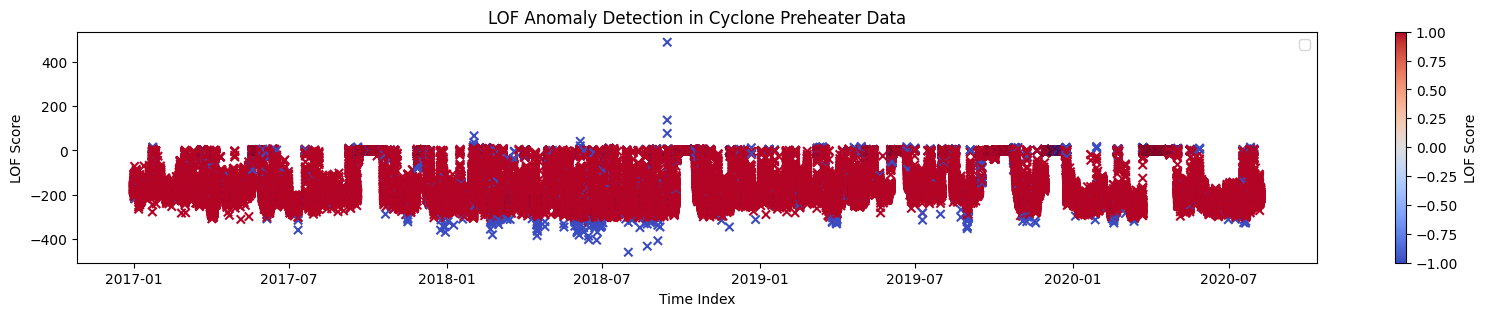

In [76]:
plt.figure(figsize=(20, 3))
plt.scatter(df.index, df['Cyclone_cone_draft'], c=df['anomalies'], cmap='coolwarm', marker='x')
# plt.scatter(df.index, df['Abnormal point'] == 1, color='red', marker='x', label='Anomalies')
# plt.axhline(y=-1.5, color='r', linestyle='--', label="Outlier threshold")
plt.colorbar(label='LOF Score')
plt.xlabel('Time Index')
plt.ylabel('LOF Score')
plt.title('LOF Anomaly Detection in Cyclone Preheater Data')
plt.legend()
plt.show()